<img src="https://ucfai.org//course/sp19/svms/banner.jpg">

<div class="col-12">
    <a class="btn btn-success btn-block" href="https://ucfai.org/signup">
        First Attendance? Sign Up!
    </a>
</div>

<div class="col-12">
    <h1> Support Vector Machines </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <strong> Stephen Testa</strong>
        (<a href="https://github.com/causallycausal">@causallycausal</a>)
     on 2019-04-03</p>
</div>

## Overview 
We will follow closely the examples presented in the lecture. First we will start with an example of the maximal margin classifer on a two-class separable dataset. Then will will look in to 

## The Maximal Margin Classifier 
Below is a plot of the maximum margin spearating hyperplane on a two-class separable dataset using a Support Vector Machine classifier with a linear kernal. 

In [2]:
# Importing the important modules
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.datasets import make_blobs 


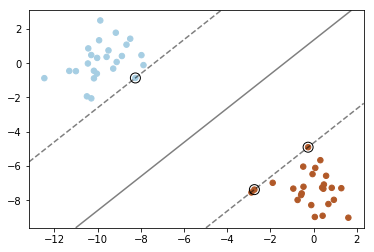

In [41]:
# First we will create 50 separable points 
X, y = make_blobs(n_samples=50, centers=2, random_state=9)

mmc = svm.SVC(kernel='linear', C=1000)
mmc.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mmc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(mmc.support_vectors_[:, 0], mmc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Remember the IRIS Dataset? 
This is the flower dataset that we have seen multiple times. Here we will use the first two features of this dataset: 
    1. Sepal Length 
    2. Sepal Width 
Remember that all the measurements are measured in cm and the source for this data set can be found [here](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x).

In this example we will see how to plot the decision surface for four SVM classifiers with different kernels.

**On a side note.**
The linear models `LinearSVC()`and `SVC(kernel='linear')` will yield slightly different decision boundaries. This might be due to the following differences: 
* `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss. 
* `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction.

The linear models have linear decision boundaries which form intersecting hyperplanes since the number of classes K = 3. On the other hand, the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

**A Word of Caution:** Plotting the decision funciton of classifiers for this data set gives an intuitive understand of their respective expressive power, but be aware that these intuitions don't always generalize to high-dimensional problems.

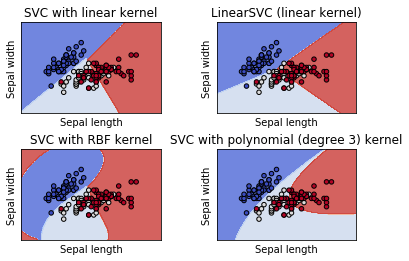

In [44]:
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Resources
[Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) A great primer for many of the topics you've encountered in this course. 

[Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) A great reference material. 

[Radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) 

[Polynomial Kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)


